In [1]:
import os, sys
import pandas as pd
import numpy as np

from utils.method import read_bic_table, make_consensus_biclusters, write_bic_table
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
in_dir = "results_on_real_data_WGCNA/" 
out_dir = "results_on_real_data_tuned_parameters/"

seeds = [116739,26225,288389,670487,777572]
suffix = ".bin=kmeans,pval=0.01,clust=WGCNA,ds=0,dch=0.995" # max average % of matched biclusters
dataset = "METABRIC" #"METABRIC" # "TCGA"

exprs = pd.read_csv("data/preprocessed_v6/METABRIC_1904_17Kgenes.log2_exprs_z_v6.tsv", sep="\t",index_col=0)
#exprs = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_z_v6.tsv", sep="\t",index_col=0)

In [3]:
biclusters = []
for seed in seeds:
    df = read_bic_table(in_dir+dataset+".seed="+str(seed)+suffix+".biclusters.tsv")
    df = df.drop_duplicates(subset =  ["n_genes","n_samples","SNR","e_pval","direction"])
    print("seed %s n biclusters: %s"%(seed,df.shape[0]))
    df.index = ["seed="+str(seed)+"_"+str(x) for x in df.index.values ]
    
    biclusters.append(df)


seed 116739 n biclusters: 48
seed 26225 n biclusters: 47
seed 288389 n biclusters: 47
seed 670487 n biclusters: 50
seed 777572 n biclusters: 52


15 s for similarity matrix
	Running Louvain ...
	curve type: increasing


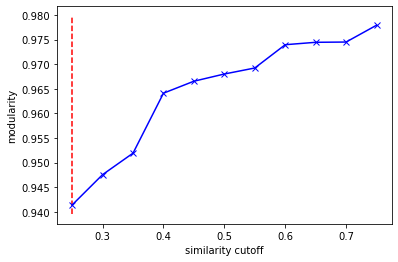

	Louvain runtime: modules detected in 0.29 s.
	modules: 48, not clustered features 2 
		similarity cutoff: 0.25 modularity: 0.941
0 s for Louvain clustering
biclusters found in 2+ runs: 48 in less then 2 runs: 2
47 s for making consensus biclusters from consensus gene sets


In [5]:
# now biclusters is a list of dataframes that will be merged and re-indexed 
consensus_biclusters = make_consensus_biclusters(biclusters, exprs, 
                                                      method = "kmeans",
                                                      similarity = "both", ## "samples", "genes" ,"both"
                                                      seed = 42,plot = False)
write_bic_table(consensus_biclusters,out_dir+dataset+".consensus_kmeans_v2.42"+suffix+".tsv")

In [9]:
i=20
print(" ".join(sorted(consensus_biclusters.loc[i,"genes"])))
#print()
#print(" ".join(sorted(consensus_biclusters.loc[i,"samples"])))
consensus_biclusters

CSAG1 CSAG2 CTAG2 DSCR8 MAGEA10 MAGEA6


,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
0,2.598924,10,267,"{FOXA1, SPDEF, FBP1, CMBL, SLC44A4, TFF3, SLC7...","{MB-0062, MB-0581, MB-6305, MB-0659, MB-2850, ...",{},"{FOXA1, CRIP1, SPDEF, FBP1, CMBL, SLC44A4, TFF...","{3265, 2947, 4964, 8813, 13586, 14866, 5237, 1...","{0, 513, 1538, 520, 1033, 1034, 12, 1550, 1039...",DOWN,5
1,2.595970,2,130,"{CYP2A6, CYP2A7}","{MB-5324, MB-0437, MB-4839, MB-6163, MB-7062, ...","{CYP2A6, CYP2A7}",{},"{3532, 3533}","{1537, 1025, 516, 1543, 8, 519, 10, 11, 1552, ...",UP,1
2,2.497958,5,33,"{SPANXC, NDST4, NRCAM, SPANXD, SPANXA2}","{MB-7193, MB-3389, MB-4933, MB-7182, MB-0637, ...","{SPANXC, NDST4, NRCAM, SPANXD, SPANXA2}",{},"{13988, 13990, 13991, 9450, 9845}","{256, 1285, 911, 917, 1816, 1689, 1822, 1057, ...",UP,5
3,2.406733,195,253,"{STAC2, GPR12, HBQ1, AIF1L, NEURL3, CDH3, C2or...","{MB-0062, MB-0659, MB-4782, MB-2850, MB-0238, ...","{STAC2, GPR12, HBQ1, AIF1L, NEURL3, CDH3, C2or...",{},"{15369, 11273, 15888, 4113, 14354, 8721, 5652,...","{0, 513, 1538, 1027, 520, 1033, 1034, 12, 1550...",UP,5
4,2.367502,94,94,"{CPB1, SEZ6, SCG3, NRSN1, MYT1, CHGB, VTN, CAR...","{MB-0437, MB-7181, MB-7266, MB-4870, MB-3026, ...","{CPB1, SEZ6, SCG3, NRSN1, MYT1, CHGB, VTN, CAR...",{},"{1553, 10769, 1044, 9752, 7195, 1055, 10792, 1...","{1026, 1543, 10, 18, 21, 1048, 28, 1094, 75, 1...",UP,5
5,2.213797,5,31,"{CT45A3, MAGEA8, DSCR8, CT45A5, CT45A6}","{MB-7028, MB-7092, MB-0420, MB-0637, MB-4784, ...","{CT45A3, MAGEA8, DSCR8, CT45A5, CT45A6}",{},"{8328, 3379, 3380, 3381, 4119}","{1414, 1800, 1033, 1423, 275, 1175, 1689, 286,...",UP,5
6,2.150359,17,381,"{FAM180B, FBXL21P, C1orf147, H2BW2, WFDC10B, P...","{MB-0062, MB-3357, MB-0054, MB-7143, MB-7181, ...","{FAM180B, FBXL21P, C1orf147, H2BW2, WFDC10B, C...",{},"{2851, 4101, 8712, 11848, 1610, 8206, 9753, 72...","{0, 1, 3, 6, 7, 10, 11, 14, 16, 17, 18, 20, 21...",UP,5
7,2.083954,27,543,"{DACH1, KLHDC9, AFF3, SLC7A8, CHCHD5, ESR1, AR...","{MB-0062, MB-0659, MB-7143, MB-4012, MB-5526, ...",{},"{DACH1, KLHDC9, AFF3, SLC7A8, CHCHD5, ESR1, AR...","{3586, 13570, 8452, 7433, 2697, 3981, 4630, 55...","{0, 12, 14, 19, 20, 24, 30, 35, 41, 45, 52, 54...",DOWN,5
8,2.032826,5,39,"{MAEL, COX7B2, PAGE2B, PAGE2, GAGE12B}","{MB-3067, MB-0581, MB-0659, MB-0342, MB-2984, ...","{MAEL, COX7B2, PAGE2B, PAGE2, GAGE12B}",{},"{3171, 8311, 10392, 10393, 5434}","{640, 1408, 642, 1536, 1030, 647, 903, 395, 77...",UP,5
9,1.968956,2,74,"{GSTA2, GSTA1}","{MB-0062, MB-7089, MB-3292, MB-5390, MB-0659, ...","{GSTA1, GSTA2}",{},"{6038, 6039}","{1668, 637, 779, 1675, 1039, 401, 20, 660, 127...",UP,5


In [10]:
# HER2+ subtype
" ".join(sorted(consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: "ERBB2" in x)]["genes"].values[0]))

'ABCA12 ABCC11 ABCC12 ALDH3B2 C2CD4A C2CD4B CATSPERB DNASE1 ERBB2 FBXL20 FGFR4 GGT2P GGTLC2 GRB7 GSDMB IYD LRFN2 MED1 MED24 MFSD2A MIEN1 MYRFL NEU4 ORMDL3 PGAP3 PNMT PRODH PSMB3 PSMD3 SAMD11 SLC6A16 SRPK3 STARD3'

In [11]:
# neuro-endocrine subtype
" ".join(sorted(consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: "CHGA" in x)]["genes"].values[0]))

'ACTL6B AP3B2 APLP1 ASCL1 ASIC2 ASPHD1 BEX1 BRINP2 BSN CA11 CACNB2 CADM2 CAMK2B CAMK2N2 CARTPT CEACAM5 CELSR3 CHGA CHGB CHST1 CNR1 CPB1 CPNE4 DDX25 DISP2 DNAI1 EFR3B ENHO FAM222A FGF10 FGF14 GDAP1 GNAO1 GNG4 GPR26 GRIN2C GRM4 HEPACAM2 HOGA1 IGSF9B INSM1 KCNC2 KCNH2 LHFPL4 MAPK8IP1 MAPK8IP2 MARCHF4 MAST1 MMP24 MUC2 MYT1 NFASC NIM1K NMNAT2 NOVA1 NRSN1 NSG2 NTS OGDHL PCSK1 PHACTR3 PHF21B PPM1E PTPRN2 REEP2 RGS7 RIMKLA RIMS2 RIPPLY2 ROBO2 RTBDN SCAMP5 SCG3 SCGN SERPINI1 SEZ6 SEZ6L SLC6A17 SLC8A2 SLITRK1 SNAP25 STX1A SYN1 SYP SYT13 SYT4 TAGLN3 TMEM121B TMEM145 TMEM151A TMEM198 TRIM9 VGF VTN'

In [12]:
consensus_biclusters.loc[consensus_biclusters["detected_n_times"]==1,:]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
1,2.595970,2,130,"{CYP2A6, CYP2A7}","{MB-5324, MB-0437, MB-4839, MB-6163, MB-7062, ...","{CYP2A6, CYP2A7}",{},"{3532, 3533}","{1537, 1025, 516, 1543, 8, 519, 10, 11, 1552, ...",UP,1
24,1.543321,2,576,"{MT1H, MT1G}","{MB-0062, MB-0054, MB-0437, MB-0659, MB-7270, ...","{MT1H, MT1G}",{},"{9084, 9085}","{1, 2, 4, 5, 7, 11, 17, 18, 19, 20, 21, 23, 24...",UP,1


In [13]:
from utils.eval import calculate_perfromance,make_ref_groups

In [14]:
classifications={"Intrinsic":["Luminal","Basal","Her2","Normal","Claudin-low"],
                "SCMOD2":["ER-/HER2-","ER+/HER2- Low Prolif","ER+/HER2- High Prolif","HER2+"],
                "IHC":["IHC_TNBC","IHC_ER","IHC_HER2","IHC_PR"]}

#subtypes = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.subtypes_and_signatures_v6.tsv",sep = "\t",index_col=0)
#annotation = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079.Xena_TCGA_PanCan.annotation_v6.tsv",sep = "\t",index_col=0)
subtypes = pd.read_csv("data/preprocessed_v6/METABRIC_1904_17Kgenes.subtypes_and_signatures_v6.tsv",sep = "\t",index_col=0)
annotation = pd.read_csv("data/preprocessed_v6/METABRIC_1904.annotation_v6.tsv",sep = "\t",index_col=0)

exprs[exprs>3] = 3
exprs[exprs<-3] = -3

subtypes = subtypes.loc[exprs.columns.values,:]
annotation = annotation.loc[exprs.columns.values,:]

known_groups, freqs = make_ref_groups(subtypes, annotation,exprs)

In [16]:
# METABRIC
performances = {}
for seed in range(0,5):
    p = calculate_perfromance(biclusters[seed], 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)
    performances[seed] = p
performances["consensus"] = calculate_perfromance(consensus_biclusters, 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)

performances["consensus 2+"] = calculate_perfromance(consensus_biclusters.loc[consensus_biclusters["detected_n_times"]>=2,:],
                                                     known_groups,freqs,
                                                     set(exprs.columns.values),
                                                     classifications=classifications)

pd.DataFrame.from_dict(performances).T

,Basal,LumB,LumA,Her2,Normal,Luminal,Claudin-low,HER2+,ER-/HER2-,ER+/HER2- Low Prolif,ER+/HER2- High Prolif,IHC_ER,IHC_HER2,IHC_TNBC,IHC_PR,overall_performance_Intrinsic,overall_performance_SCMOD2,overall_performance_IHC
0,0.863469,0.556914,0.506055,0.489552,0.084211,0.930742,0.160535,0.792157,0.691892,0.562937,0.470756,0.929741,0.832090,0.681682,0.636184,0.812141,0.578474,0.798734
1,0.863469,0.553223,0.504310,0.483483,0.086059,0.933616,0.160535,0.808000,0.691892,0.560976,0.473984,0.935154,0.847909,0.681682,0.623267,0.813414,0.580663,0.798267
2,0.844765,0.559570,0.505181,0.496988,0.085179,0.929986,0.157377,0.798419,0.698925,0.561955,0.471766,0.929010,0.831461,0.689552,0.628176,0.810132,0.580520,0.796422
3,0.863469,0.543510,0.504745,0.479290,0.085763,0.930035,0.160535,0.789062,0.691892,0.561465,0.467949,0.929059,0.842697,0.681682,0.621810,0.810441,0.576626,0.794406
4,0.844765,0.550038,0.506055,0.514881,0.085714,0.929379,0.157377,0.762264,0.698925,0.562937,0.469708,0.931058,0.802158,0.689552,0.615623,0.811925,0.576269,0.790897
consensus,0.847584,0.546262,0.503863,0.507645,0.100503,0.931206,0.157377,0.811245,0.698925,0.557576,0.469578,0.926230,0.823308,0.689552,0.621247,0.813035,0.579602,0.792103
consensus 2+,0.847584,0.546262,0.503863,0.507645,0.100503,0.931206,0.157377,0.811245,0.698925,0.557576,0.469578,0.926230,0.823308,0.689552,0.621247,0.813035,0.579602,0.792103
